In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,confusion_matrix


# Coletando os dados

In [16]:
df = pd.read_csv('diabetesTeste.csv')
df

#Glicose, Pressão Sanguínea, Espessura da Pele, Insulina, Índice de Massa Corporal, Idade, Tem ou não diabetes

,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,50,1
1,85.0,66.0,29.0,NaN,26.6,31,0
2,183.0,64.0,NaN,NaN,23.3,32,1
3,89.0,66.0,23.0,94.0,28.1,21,0
4,137.0,40.0,35.0,168.0,43.1,33,1
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,63,0
764,122.0,70.0,27.0,NaN,36.8,27,0
765,121.0,72.0,23.0,112.0,26.2,30,0
766,126.0,60.0,NaN,NaN,30.1,47,1


# Pré-processamento dos dados 

In [17]:
print(f"Elementos faltantes:\n{df.isna().sum()}\n") 

#preechendo os elementos faltantes com a média da coluna
imputer = SimpleImputer(strategy='mean') 
df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = imputer.fit_transform(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]])

print("Não há variáveis categóricas\n")

# Calcula os valores mínimos e máximos necessários para normalização no intervalo [0,1]
scaler = MinMaxScaler()
df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = scaler.fit_transform(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]])



Elementos faltantes:
Glucose             5
BloodPressure      35
Skin Thickness    227
Insulin           374
BMI                11
Age                 0
Outcome             0
dtype: int64

Não há variáveis categóricas



# DataFrame original após o tratamento dos elementos faltantes

In [18]:
novo_arquivo = 'Diabetes_atual.csv'

# Salvando o DataFrame resultante em um novo arquivo CSV
df.to_csv(novo_arquivo, index=False) 

print(f'DataFrame salvo com sucesso! A partir de agora, utilizar o novo arquivo: {novo_arquivo}')

df = pd.read_csv('Diabetes_atual.csv')
df

DataFrame salvo com sucesso! A partir de agora, utilizar o novo arquivo: Diabetes_atual.csv


,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,Age,Outcome
0,0.670968,0.489796,0.304348,0.170130,0.314928,0.483333,1
1,0.264516,0.428571,0.239130,0.170130,0.171779,0.166667,0
2,0.896774,0.408163,0.240798,0.170130,0.104294,0.183333,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.000000,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.200000,1
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.700000,0
764,0.503226,0.469388,0.217391,0.170130,0.380368,0.100000,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.150000,0
766,0.529032,0.367347,0.240798,0.170130,0.243354,0.433333,1


# Implementação e Treino

In [19]:
# Estamos usando 30% de teste e %70% de treinamento

XTrain, XTest, yTrain, yTest = train_test_split(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]], df["Outcome"], test_size = 0.3)

In [20]:
# O modelo ajusta os parâmetros (coeficientes) para minimizar a função de custo, 
#  que mede a diferença entre as previsões do modelo e os rótulos reais.

modelLogistic = LogisticRegression()
modelLogistic.fit(XTrain, yTrain) # Treinando o modelo de regressão logística nos dados de treinamento.

########################################################################################################################


# O algoritmo KNN faz previsões atribuindo a classe mais comum entre os k vizinhos mais próximos da instância de entrada.
# A ideia central do KNN é classificar ou prever novas instâncias com base nas classes das instâncias vizinhas no espaço de características.
# Utilize uma métrica de distância (geralmente a distância euclidiana) para calcular a similaridade entre os pontos de dados. 
# Quanto menor a distância, mais similar são os pontos.

k = 5  #número de vizinhos a serem considerados no algoritmo KNN
modelKnn = KNeighborsClassifier(n_neighbors = k)  #cria o modelo KNN
modelKnn.fit(XTrain, yTrain) #Treina o modelo

##########################################################################################################################


#Durante o treinamento, a árvore de decisão faz divisões nas características com base em critérios como entropia ou índice Gini
# tentando criar ramos que melhor separam as instâncias pertencentes a diferentes classes.

modelDT = DecisionTreeClassifier(random_state=0) #garantir que os resultados sejam os mesmos em diferentes execuções do código.
modelDT.fit(XTrain, yTrain)

DecisionTreeClassifier(random_state=0)

# Avaliando o modelo Regressão Logistica

     Verdadeiro  Predição
522           0         0
720           0         0
658           0         1
442           0         0
118           0         0
..          ...       ...
344           0         0
55            0         0
123           0         1
476           1         0
705           0         0

[231 rows x 2 columns]
Acurácia: 0.7705627705627706
Precisão: 0.6290322580645161
Recall: 0.5652173913043478
F1-score: 0.5954198473282443


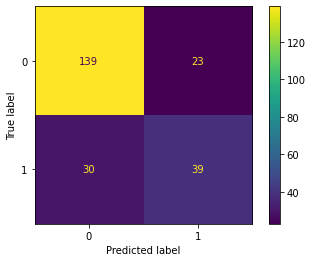

In [24]:
yPred = modelLogistic.predict(XTest) #realiza as previsoes no modelo treinado

df_resultado = pd.DataFrame({'Verdadeiro': yTest, 'Predição': yPred})
print(df_resultado)

#A acurácia mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
# Quanto mais alta a acurácia, melhor o desempenho do modelo em fazer previsões precisas
accuracy = accuracy_score(yTest, yPred)

# A precisão se concentra em quão precisas são as previsões positivas do modelo. 
#A precisão é uma métrica importante, especialmente em casos em que prever falsos positivos é indesejável
#Quanto maior a precisão, melhor o modelo é em evitar previsões positivas incorretas.
precision = precision_score(yTest, yPred)

# O recall se concentra em quão bem o modelo é capaz de capturar todas as instâncias positivas do conjunto de dados.
# O recall é uma métrica importante, especialmente em situações em que a não detecção de instâncias positivas (falsos negativos) é indesejável. 
# Quanto maior o recall, melhor o modelo é em identificar corretamente as instâncias positivas.
recall = recall_score(yTest, yPred)

# F1_Score é uma métrica que combina a precisão (proporção de previsões positivas corretas) e o recall (proporção de instâncias positivas reais que foram corretamente identificadas pelo modelo) em um único valor.
# Essa métrica fornece um equilíbrio entre precisão e recall.
# Um valor alto de F1-Score indica um equilíbrio positivo entre a precisão e o recall do modelo.
f1 = f1_score(yTest, yPred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculando a matriz de confusão usando sklearn
matriz = confusion_matrix(yTest, yPred)

# Criando uma exibição da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.show()

# Avaliando o modelo KNN

Comparação - KNN
     Verdadeiro  Predição
522           0         1
720           0         0
658           0         1
442           0         0
118           0         0
..          ...       ...
344           0         0
55            0         0
123           0         0
476           1         0
705           0         0

[231 rows x 2 columns]
Acurácia: 0.7489177489177489
Precisão: 0.5679012345679012
Recall: 0.6666666666666666
F1-score: 0.6133333333333333


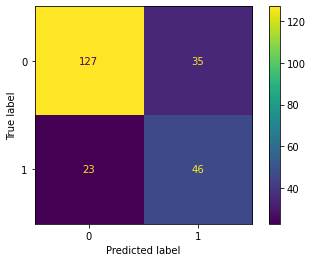

In [25]:
# Gerando previsões usando o modelo KNN
yPredKnn = modelKnn.predict(XTest)

# Criando um DataFrame que compara os rótulos verdadeiros com as previsões
df_resultado_knn = pd.DataFrame({'Verdadeiro': yTest, 'Predição': yPredKnn})
print("Comparação - KNN")
print(df_resultado_knn)

# Calculando e imprima métricas de desempenho
accuracy_knn = accuracy_score(yTest, yPredKnn)
precision_knn = precision_score(yTest, yPredKnn)
recall_knn = recall_score(yTest, yPredKnn)
f1_knn = f1_score(yTest, yPredKnn)

print(f"Acurácia: {accuracy_knn}")
print(f"Precisão: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")

# Calculando a matriz de confusão usando sklearn
matriz_knn = confusion_matrix(yTest, yPredKnn)

# Criando uma exibição da matriz de confusão
disp_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_knn)
disp_knn.plot()
plt.show()

# Avaliando o modelo Arvore de Decisão 

Comparação - Árvore de Decisão
     Verdadeiro  Predição
522           0         0
720           0         0
658           0         0
442           0         0
118           0         0
..          ...       ...
344           0         1
55            0         0
123           0         0
476           1         0
705           0         0

[231 rows x 2 columns]
Acurácia: 0.645021645021645
Precisão: 0.42857142857142855
Recall: 0.5652173913043478
F1-score: 0.4875


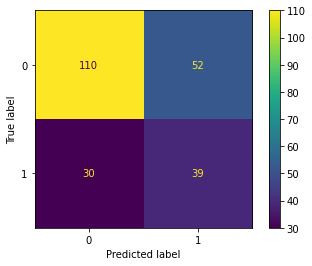

In [26]:
# Gerando previsões usando o modelo de Árvore de Decisão
yPredDT = modelDT.predict(XTest)

# Criando um DataFrame que compara os rótulos verdadeiros com as previsões
df_resultado_dt = pd.DataFrame({'Verdadeiro': yTest, 'Predição': yPredDT})
print("Comparação - Árvore de Decisão")
print(df_resultado_dt)

# Calculando e imprima métricas de desempenho
accuracy_dt = accuracy_score(yTest, yPredDT)
precision_dt = precision_score(yTest, yPredDT)
recall_dt = recall_score(yTest, yPredDT)
f1_dt = f1_score(yTest, yPredDT)

print(f"Acurácia: {accuracy_dt}")
print(f"Precisão: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")

# Calculando a matriz de confusão usando sklearn
matriz_dt = confusion_matrix(yTest, yPredDT)

# Criando uma exibição da matriz de confusão e a exiba
disp_dt = ConfusionMatrixDisplay(confusion_matrix=matriz_dt)
disp_dt.plot()
plt.show()

# Observações:

# Regressão Logistica:

Acurácia: 0.7705627705627706  -> O modelo classificou corretamente cerca de 77.06%.
                              
Precisão: 0.6290322580645161  -> O modelo classificou como positivas, cerca de 62.90% eram realmente positivas.
                              Indica a habilidade do modelo em evitar falsos positivos.

Recall: 0.5652173913043478    -> O modelo identificou corretamente cerca de 56.52% das instâncias que eram realmente positivas.
                              Destaca a capacidade do modelo de capturar instâncias realmente positivas.

F1-score: 0.5954198473282443  -> Aproximadamente 59.54% sugere um equilíbrio entre a precisão e recall no modelo.



# Modelo KNN:

Acurácia: 0.7489177489177489 -> O modelo KNN classificou corretamente cerca de 74.89% 

Precisão: 0.5679012345679012 -> O modelo classificou como positivas, cerca de 56.79% eram realmente positivas.
                                Destaca a habilidade do modelo em evitar falsos positivos.

Recall: 0.6666666666666666  -> O modelo KNN identificou corretamente cerca de 66.67% das instâncias que eram realmente positivas.
                               Indica a capacidade do modelo KNN de capturar instâncias realmente positivas.

F1-score: 0.6133333333333333 -> Aproximadamente 61.33% sugere um equilíbrio entre precisão e recall no modelo KNN.

# Modelo Árvore de Decisão

Acurácia: 0.645021645021645    -> O modelo de Árvore de Decisão classificou corretamente cerca de 64.50%. 

Precisão: 0.42857142857142855  -> Aproximadamente 42.86% significa que, das instâncias que o modelo classificou como positivas, cerca de 42.86% eram realmente positivas. Destaca a habilidade do modelo em evitar falsos positivos.

Recall: 0.5652173913043478     -> O modelo de Árvore de Decisão identificou corretamente cerca de 56.52% das instâncias que eram realmente positivas. Indica a capacidade do modelo de Árvore de Decisão de capturar instâncias realmente positivas.

F1-score: 0.4875  -> Aproximadamente 48.75% sugere um equilíbrio entre precisão e recall no modelo de Árvore de Decisão.